In [69]:
import pandas as pd

data= pd.read_csv('housing.csv')
data.head()
data.shape

(20640, 9)

In [70]:
y = data.pop('median_house_value')
y.shape

(20640,)

In [71]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41,880,129.0,322,126,8.3252
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014
2,-122.24,37.85,52,1467,190.0,496,177,7.2574
3,-122.25,37.85,52,1274,235.0,558,219,5.6431
4,-122.25,37.85,52,1627,280.0,565,259,3.8462


In [72]:
data.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

In [73]:
sampels_with_missing_values= data.isnull().any(axis=1)
y = y[~sampels_with_missing_values]
x = data.dropna()
print(y.shape)
x.shape

(20433,)


(20433, 8)

In [74]:
N,p = data.shape
print('Dataset contains {} sampels and {} features'.format(N,p))

Dataset contains 20640 sampels and 8 features


In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

lr_model = LinearRegression()
lr_model.fit(x, y)

print(lr_model.coef_)
print(lr_model.intercept_)


[-4.27301205e+00 -4.25097369e+00  1.15790031e-01 -8.24972507e-04
  1.13820707e-02 -3.83855780e-03  4.77013513e-03  4.02975217e+00]
-358.5395747892445


In [76]:
x_test=x.iloc[3:4,:]
y_hat_test=lr_model.predict(x_test)

print("Actual target value for the sample in index 3={:.2f}".format(y[3]))
print("Estimated target value for sample in index 3={:.2f}".format(y_hat_test[0]))

Actual target value for the sample in index 3=34.13
Estimated target value for sample in index 3=32.22


In [77]:
y_test = lr_model.predict(x)

mse= mean_squared_error(y,y_test)
mae= mean_absolute_error(y,y_test)

print("Training set MSE={:.2f}".format(mse))
print("Training set MAE={:.2f}".format(mae))

Training set MSE=48.38
Training set MAE=5.08


<class 'pandas.core.series.Series'>


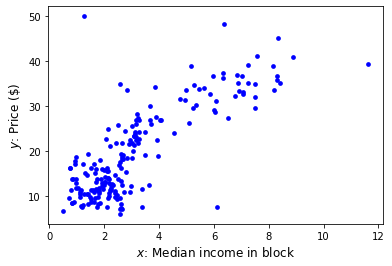

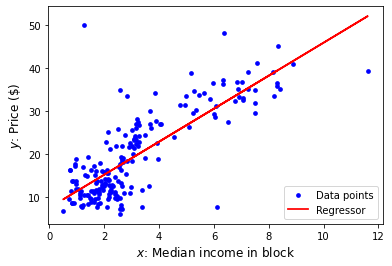

y_hat = f(x) = 3.8494x + 7.4645


In [78]:
import matplotlib.pyplot as plt
import pandas as pd

x_new=x.copy()
x_new=x_new.loc[range(200),"median_income"]
y_new=y.copy()
y_new=y_new.loc[range(200)]
print(type(x_new))

fig,ax=plt.subplots()
ax.scatter(x_new, y_new, marker='.', label="Data points", color='blue',linewidth=1.75)
ax.set_xlabel("$x $: Median income in block",fontsize=12)
ax.set_ylabel("$y $: Price (\$)",fontsize=12)

plt.show()

x_new = x_new.values
x_new =x_new.reshape(-1,1)

lr_new_model= LinearRegression()

lr_new_model.fit(x_new,y_new)
fig,ax=plt.subplots()
ax.scatter(x_new, y_new, color='blue', marker='.', linewidth=1.75, label='Data points')
ax.set_xlabel("$x $: Median income in block", fontsize=12)
ax.set_ylabel("$y $: Price (\$)", fontsize=12)

y_pred = lr_new_model.predict(x_new)
ax.plot(x_new,y_pred, color="red",linewidth=1.75, label="Regressor")

ax.legend()
plt.show()
w = lr_new_model.coef_[0]
b = lr_new_model.intercept_
print("y_hat = f(x) = {:.4f}x + {:.4f}".format(w, b))